### Basic Model

In [8]:
import numpy as np
import keras
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.layers import Dense,Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization 
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report

In [9]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.loss = []
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        self.loss.append(logs.get('loss'))
        X_val, y_val = self.validation_data[0], self.validation_data[1]
        y_predict = np.asarray(model.predict(X_val))
        y_val = np.argmax(y_val, axis=1)
        y_predict = np.argmax(y_predict, axis=1)
        self.val_recalls.append(recall_score(y_val, y_predict, average=None))
        self.val_precisions.append(precision_score(y_val, y_predict, average=None))
        self.val_f1s.append(f1_score(y_val,y_predict, average=None))

In [10]:
data = np.load('/home/aj/assignments/assign2/outfile.npz')
X_train=data["X_train.npy"]
X_test=data["X_test.npy"]
y_train=data["y_train.npy"]
y_test=data["y_test.npy"]
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0],28, 28,3).astype('float32')
X_test = X_test.reshape(X_test.shape[0],28, 28,3).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)

print(y_train.shape)
num_classes = y_test.shape[1]
print(num_classes)

input_shape=(28,28,3)
epochs=15 
batch_size = 512
history = AccuracyHistory()

(57600, 96)
96


In [11]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(7, 7), strides=(1, 1),activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

print(model.summary())
# history.get_data()
model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,validation_split=0.05,callbacks=[history])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
y_pred = model.predict_classes(X_test)
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 22, 22, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              3965952   
_________________________________________________________________
dense_4 (Dense)              (None, 96)                98400     
Total params: 4,069,216
Trainable params: 4,069,152
Non-trainable params: 64
_________________________________________________________________

In [12]:
from keras.models import load_model

model.save('init_model_line.h5')  # creates a HDF5 file 'my_model.h5'

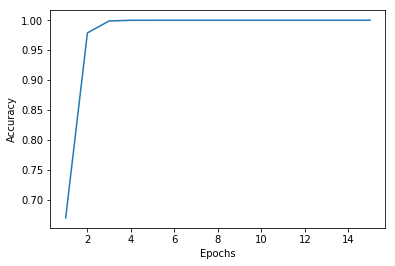

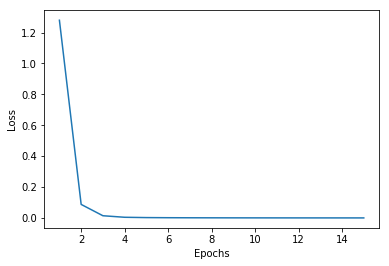

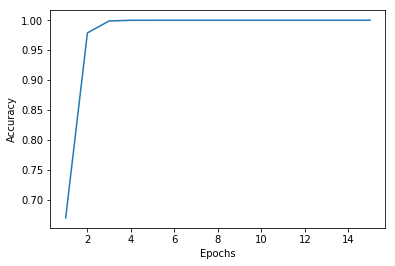

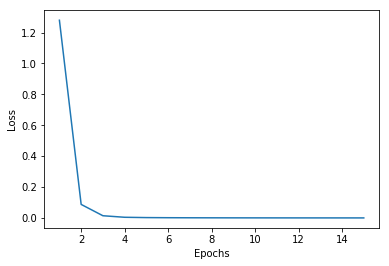

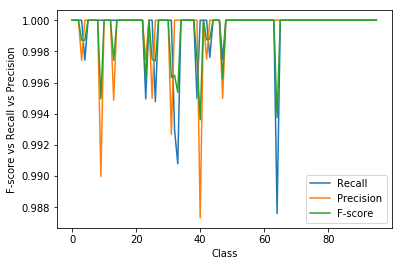

In [13]:
fscore=f1_score(np.argmax(y_test,axis=1), y_pred,average=None)
recall=recall_score(np.argmax(y_test,axis=1), y_pred,average=None)
prec=precision_score(np.argmax(y_test,axis=1), y_pred,average=None)
plt.plot(range(1,epochs+1), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
plt.plot(range(1,epochs+1), history.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(recall,label='Recall')
plt.plot(prec,label='Precision')
plt.xlabel('Class')
plt.ylabel('F-score vs Recall vs Precision')
plt.plot(fscore,label='F-score')
plt.legend()

In [14]:
avg_fscore=np.mean(fscore)
print(avg_fscore)

0.9994552693342978


In [ ]:
avg_precision=np.mean(prec)
print(avg_prec)

In [ ]:
avg_recall=np.mean(recall)
print(avg_recall)

## Plot heatmap of confusion matrix

In [17]:
cnf_mat = confusion_matrix(np.argmax(y_test,axis=1), y_pred)

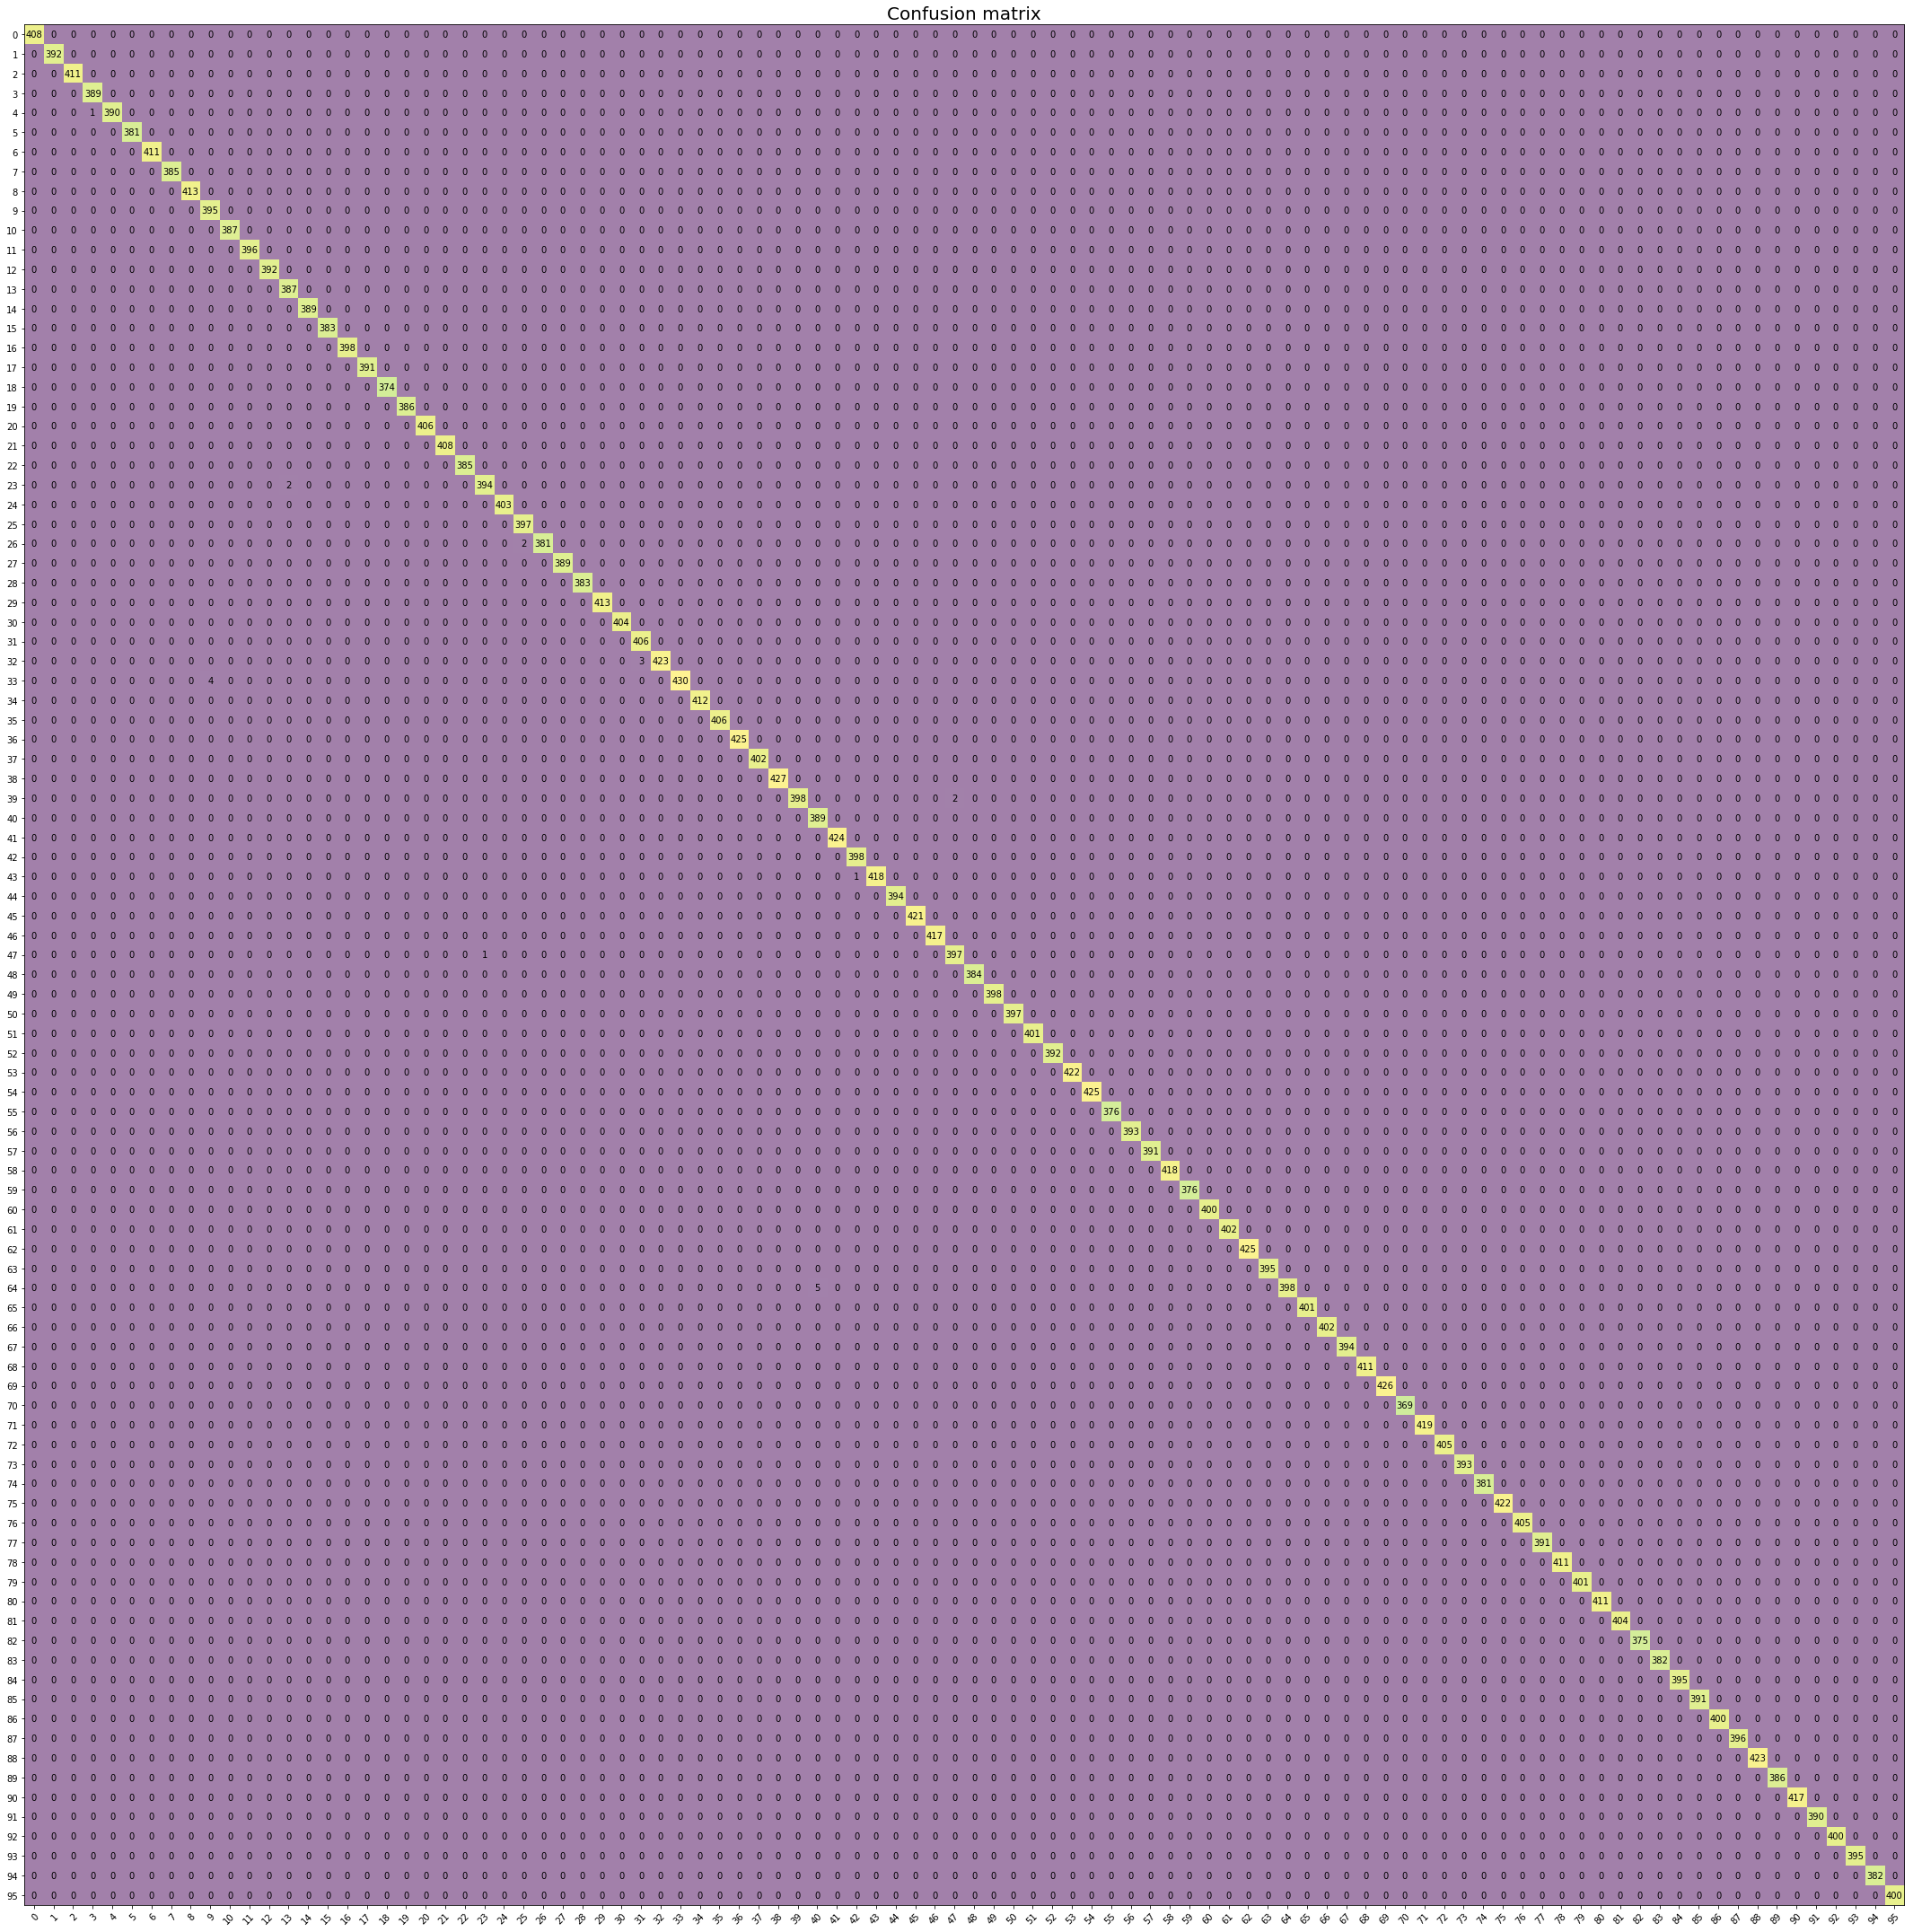

In [19]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


conf = cnf_mat


fig, ax = plt.subplots(figsize=(30,30))
im = ax.imshow(conf,alpha=0.5)
# plt.show()

# We want to show all ticks...
ax.set_xticks(np.arange(cnf_mat.shape[0]))
ax.set_yticks(np.arange(cnf_mat.shape[1]))
# ... and label them with the respective list entries
ax.set_xticklabels(np.arange(0,96))
ax.set_yticklabels(np.arange(0,96))

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(cnf_mat.shape[0]):
    for j in range(cnf_mat.shape[1]):
        text = ax.text(j, i, conf[i, j],
                       ha="center", va="center",color="black",fontsize=10)
ax.set_title("Confusion matrix",fontsize=20)
fig.tight_layout()

# fig.savefig('plot1_cnf.png')
plt.show()
